Unsupervised Learning and Preprocessing
---------

Unsupervised Learning?
- 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝

### 3.1 Types of unsupervised learning

#### unsupervised transformation
- 비지도 변환
- 데이터를 새롭게 표현하거나 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
- 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소이다.
  - dimensionality reduction
- 많은 텍스트 문서에서 주제를 추출하는 것이 예시

#### clustering
- 데이터를 비슷한 것끼리 그룹으로 묶는 것

### 3.2 Challenges in unsupervised learning

비지도 학습에서 가장 어려운 건 알고리즘이 뭔가 유용한 것을 학습했는지 **평가**하는 것
- 레이블이 없는 데이터에 적용해야 하기 때문, 무엇이 올바른 출력인가?
- 별다른 방법 없이 직접 확인하는 것이 유일한 방법일 때가 많다.

그래서 비지도 학습의 경우 데이터를 더 잘 이해하고 싶을 때 EDA 단계에서 많이 사용
- 지도 학습의 전처리 단계에서도 사용, 비지도 학습의 결과로 새롭게 표현된 데이터를 사용하면 지도 학습의 정확도가 좋아지기도 함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from matplotlib import font_manager, rc
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 3.3 데이터 전처리와 스케일 조정

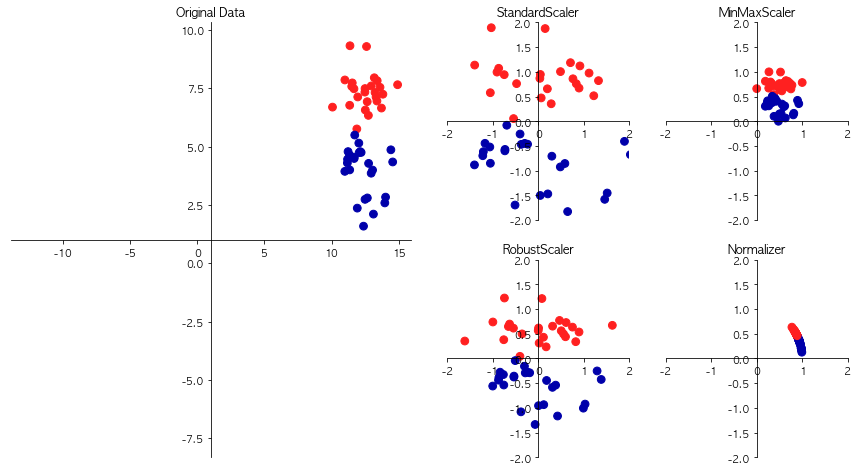

In [4]:
mglearn.plots.plot_scaling()

#### 3.3.1 여러 가지 전처리 방법


**StandardScaler**
- 각 feature의 평균을 0, 분산을 1로 변경하여 모든 feature가 같은 크기를 가지게 함
- z score를 생각하자, 표준점수!!
- feature의 최솟값과 최댓값 크기를 제한하지는 않음

**RobustScaler**
- feature들이 같은 scale을 갖게 된다는 통계적 측면에서 StandardScaler와 비슷
- 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용
- 이런 방식 덕분에 전체 데이터와 아주 동떨어진 값에 영향을 받지 않음(outlier에 영향을 받지 않음)

**MinMaxScaler**
- 모든 feature가 정확하게 0과 1 사이에 위치하도록 데이터를 변경
- 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y 축의 0과 1 사이의 사각 영역에 담기게 됨

**Normalizer**
- 매우 다른 스케일링 방법
- 특성 벡터의 유클리디안 길이가 1이 되도록 데이터를 조정
- 바꿔 말하면 지름이 1인 원(3차원의 경우 구)에 각 데이터 포인트를 투영
  - 데이터 포인트가 다른 비율로 스케일이 조정
  - 데이터의 방향 또는 각도가 중요할 때 많이 사용

#### 3.3.2 데이터 변환 적용하기

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [7]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
# 데이터 변환
# sklearn의 transform은 새로운 데이터를 표현(representation)을 만들 때 사용하는 방법

X_train_scaled = scaler.transform(X_train)

# 스케일이 조정된 후 데이터셋의 속성을 출력합니다

print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 3.3.3 QuantileTransformer & PowerTransformer

**QuantileTransformer**
- 1000개의 quantile를 사용하여 데이터를 균등하게 분포
- 이상치에 민감하지 않으며, 전체 데이터를 0과 1사이로 압축

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

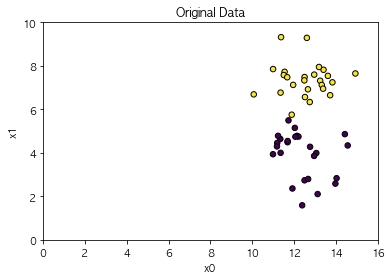

In [11]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

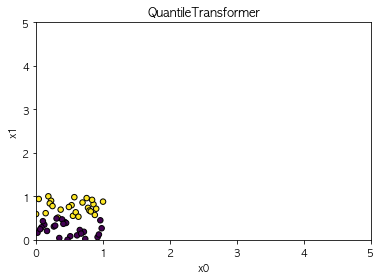

In [12]:
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

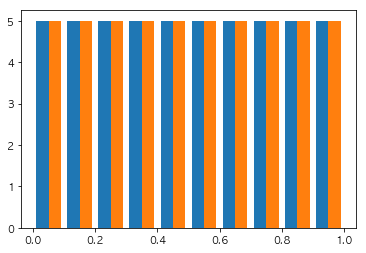

In [13]:
plt.hist(X_trans)
plt.show()

In [14]:
# n_quantiles parameter의 default 값은 1000

print(scaler.quantiles_.shape)

(1000, 2)


**example code**

In [15]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]
[9.99999998e-08 2.50083417e-01 5.00250250e-01 7.50000000e-01
 9.99999900e-01]


QuantileTransformer는 output_distribution parameter에서 normal로 지정하여 균등 분포가 아니라, 정규분포로 출력을 바꿀 수 있다.

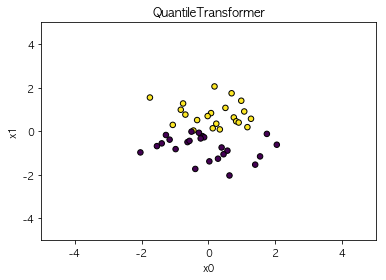

In [16]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

**PowerTransformer**

데이터의 feature 별로 정규분포 형태에 가깝게 변환해주는 역할
- default : yeo-johnson
- box-cox도 가능

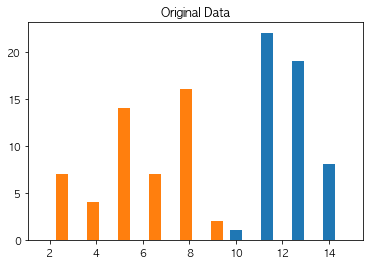

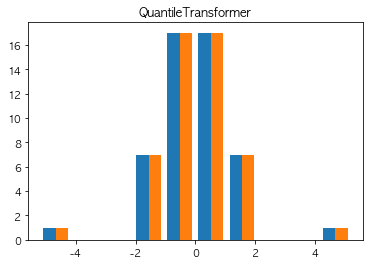

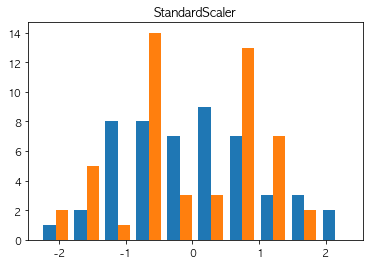

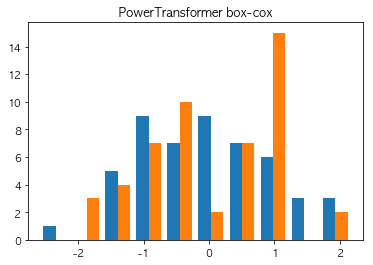

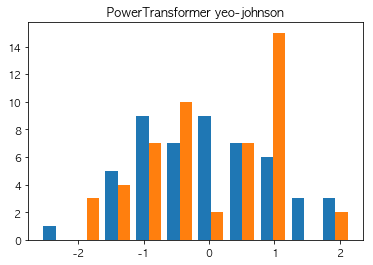

In [17]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

#### 3.3.4 Scaling training and test data the same way

- 지도 학습에서는 train set과 test set의 스케일링을 같이 해주었다.
- 하지만 테스트 세트의 최솟값과 범위를 사용 했을 떄 어떤 일이 일어나는지 살펴보자.

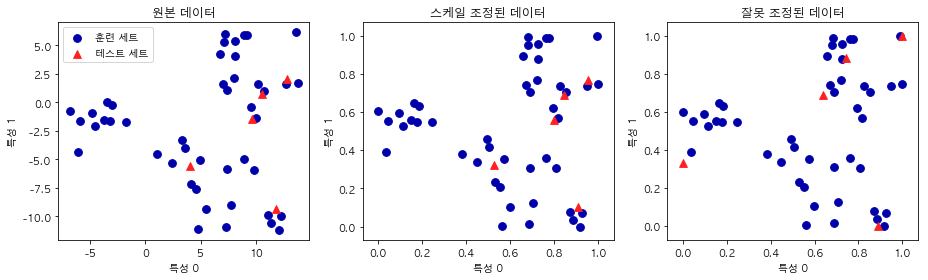

In [18]:
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

- 세 번쨰 그래프를 보면, 서로 다른 방식으로 조정했을 때 발생할 수 있는 문제를 보여줌
- 모두 최솟값과, 최댓값이 0과 1
- 다른 비율로 이동이 일어남

### Tips

- 보통 어떤 데이터셋에 fit을 적용하면 transform을 호출
- 매우 전형적인 방법이라 효율적인 방법이 필요함
- 이럴 경우를 위해 transform을 가진 모든 모델은 fit_transform 메서드를 제공
- 코드도 더 깔끔해서 좋은 것 같다.
- 주의 할 것은 test set에서 fit_transform()을 적용하면 train set에서 학습한 내용이 모두 지워짐
  - test_set에서는 반드시 transform()을 사용해야 함

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다
X_scaled = scaler.fit(X_train).transform(X_train)

# 위와 동일하지만 더 효율적입니다
X_scaled_d = scaler.fit_transform(X_train)

#### 3.3.5 지도 학습에서 데이터 전처리 효과

In [20]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,random_state=0
)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
# preprocessing using 0-1 scaling

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# preprocessing using zero mean and unit variance scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


### 3.4 Dimensionality Reduction(차원 축소), Feature Extraction(특성 추출) and Manifold Learning(매니폴드 학습)

- 비지도 학습을 사용해서 데이터를 변환하는 이유
  - 시각화
  - 데이터 압축
  - 추가적인 처리
  - 정보를 더 얻기 위해.

#### 3.4.1 Principal component analysis, PCA(주성분 분석)

PCA는 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전 시키는 기술
- Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models.
- 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택

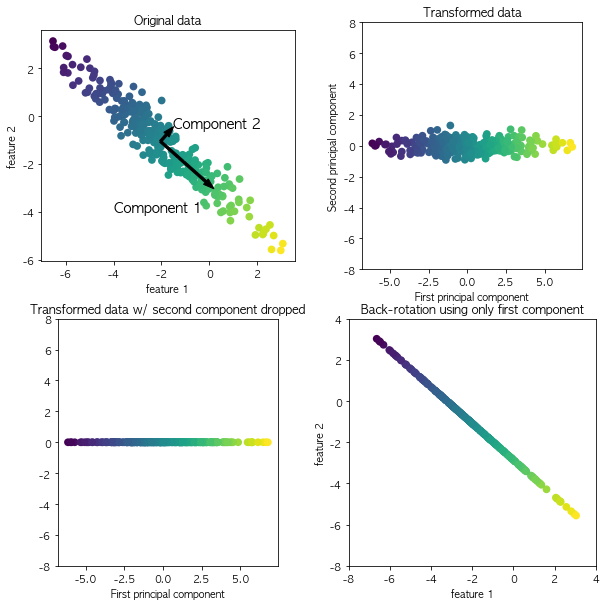

In [23]:
mglearn.plots.plot_pca_illustration()

그래프 해석

- 첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시
  - component 1 이라고 쓰여 있는, 분산이 가장 큰 방향을 찾음
  - 이 방향(벡터)가 데이터에서 가장 많은 정보를 담고 있는 방향
  - 특성들의 상관관계가 가장 큰 방향
  - 그 후 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾음
  - 2차원에서 표현되는 직각일 뿐 어느 방향으로 표시 될 수 있다.
  - 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분(principal component)라고 한다.
  - 일반적으로 원본 feature 개수만큼의 주성분이 존재

- 두 번쨰 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축, y축에 나란하도록 회전
  - 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞춤
  - PCA에 의해 회전한 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됨

PCA는 주성분의 일부만 남기는 차원 축소 용도로 사용 가능

- 세 번쨰 그래프
  - 첫 번쨰 주성분만 유지
  - 차원 감소
  - 가장 유용한 방향을 찾아서 그 방향의 성분을 유지 하려고 함
  
- 네 번쨰 그래프
  - 데이터에 다시 평균을 더하고 반대로 회전
  - 이런 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는데 종종 사용

#### PCA를 적용해 유방암 데이터셋 시각화하기

- PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화
- feature가 30개나 있는 유방암 데이터셋을 어떻게 표현해야 할까...?
- 아래 그림에 대한 설명
  - 각 feature에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터가 나타나는지 횟수를 센 것
  - 악성과 양성 그래프를 겹쳐 놓고, 어떤 feature가 악성과 양성을 구분하는 데 더 좋은지 가늠해볼 수 있다.
  - 거의 겹치는 건 쓸모가 없지만, 확연히 구분되는 건 매우 유용하다.
- 그러나 이 그래프는 feature 간의 상호작용이나, 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다.
  - PCA를 사용하면, 주요 상호작용을 찾아낼 수 있다.

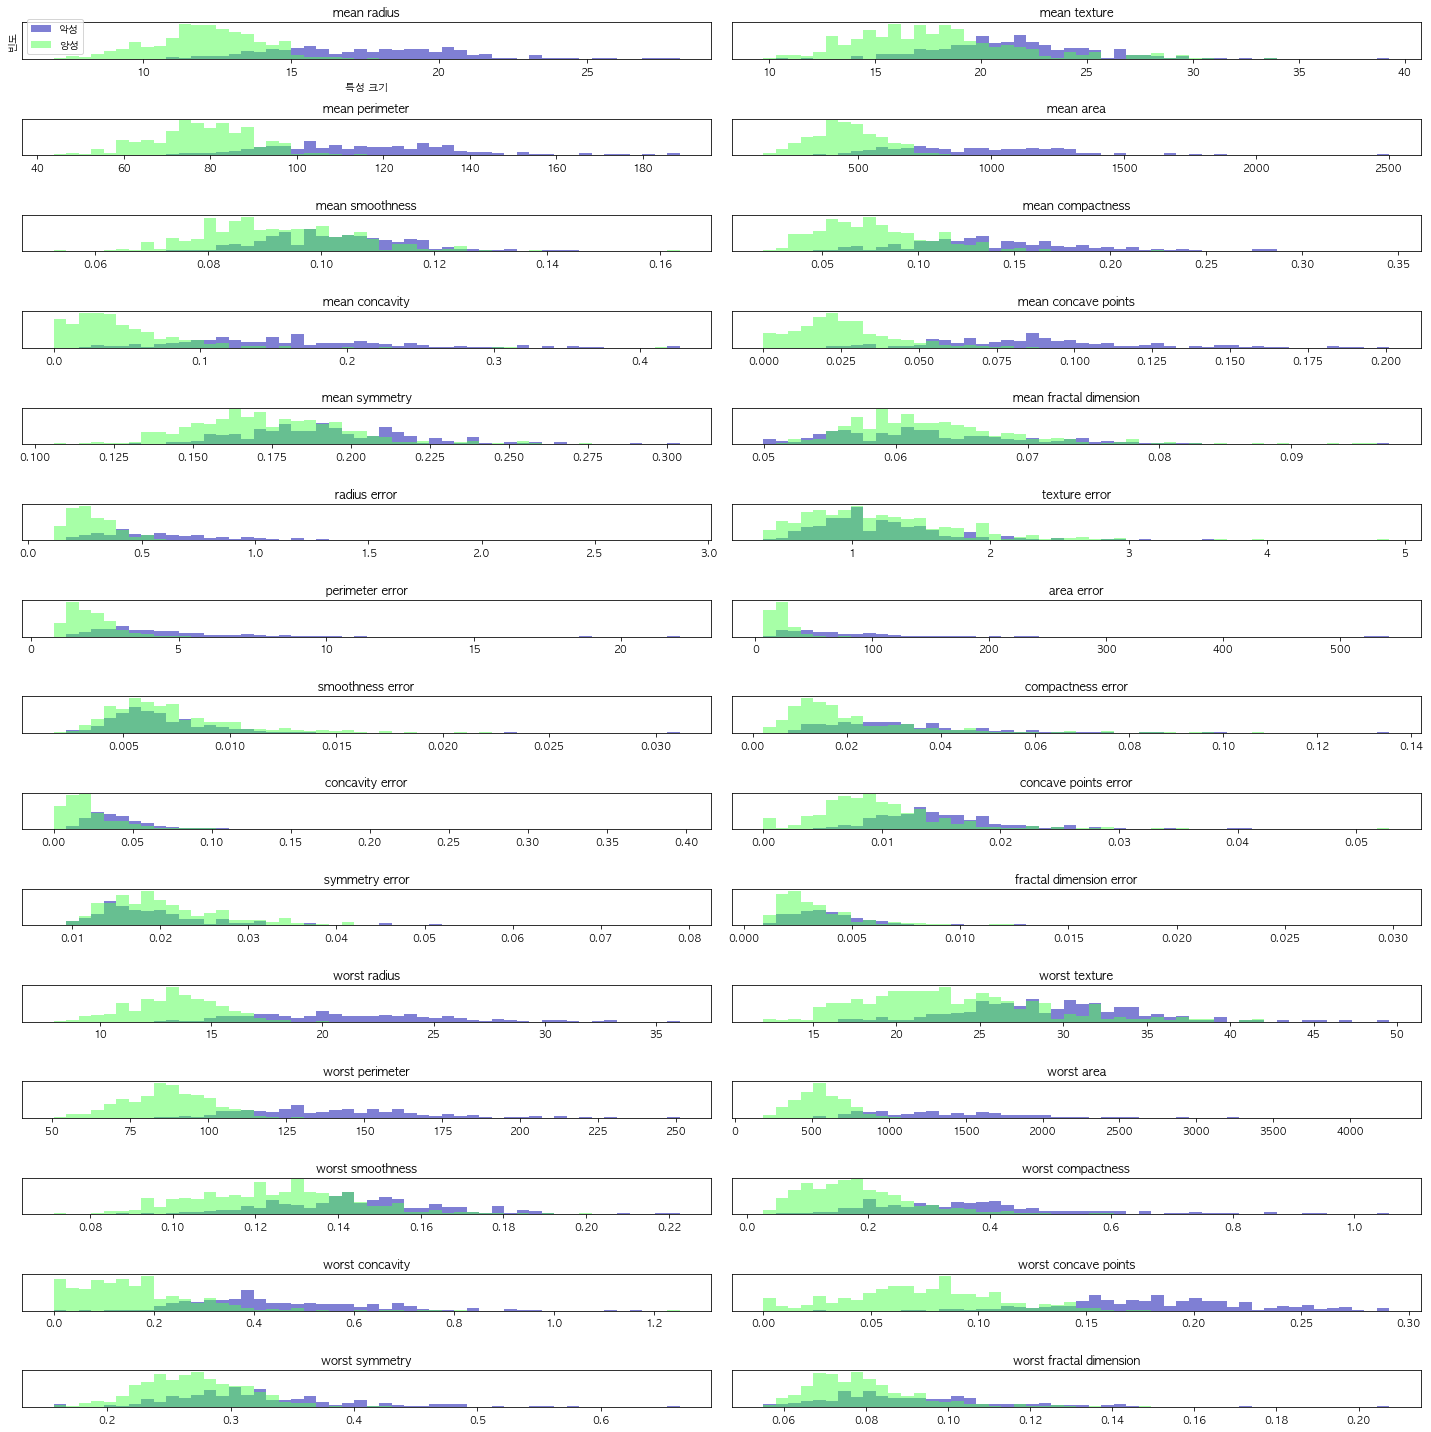

In [26]:
fig, axes = plt.subplots(15, 2, figsize=(20, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

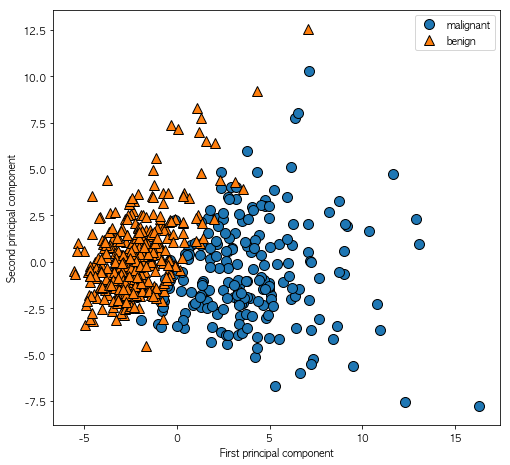

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


# plot first vs. second principal component, colored by class

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

- PCA의 단점은 두 축을 해석하기가 쉽지 않는 것
- 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태

In [30]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

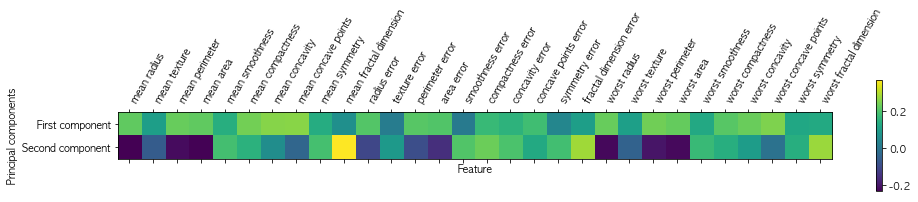

In [31]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

- 첫 번째 주성분의 모든 특성은 부호가 같다(모두 양수지만, 주성분의 화살표 방향은 아무 의미가 없다..)
  - 이 말은 모든 특성 사이에 공통의 상호관계가 있다는 뜻
  - 따라서 한 특성의 값이 커지면 다른 값들도 높아지리라 전망
- 두 번쨰 주성분은 부호가 섞여 있다.
- 설명이 어려움...